In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import seaborn
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.5.1/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time = [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
def Find_Month(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
        Month = New_Time.month
    except:
        Month = numpy.nan
    return (Month)

In [7]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lon_Bins = Create_Bins(-100,20,5)
Lat_Bins = Create_Bins(0,60,5)

In [8]:
Num_Years = numpy.array([90,93,93])

In [9]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [10]:
Control_ET

,Code,Name,ABC,Trans Type,ET Begin Time,ET Complete Time,Peak Time,Trop Peak Time,Genesis Time,Peak SLP,...,Trop Peak Lat,ET Begin SLP,ET Begin Lon,ET Begin Lat,ET Complete SLP,ET Complete Lon,ET Complete Lat,Genesis SLP,Genesis Lon,Genesis Lat
0,TC190001,Alex,A,3,1900-07-03 18:00:00,1900-07-03 18:00:00,1900-06-25 06:00:00,1900-06-25 06:00:00,1900-06-19 18:00:00,987.41,...,29.95,1015.57,-90.75,36.25,1015.57,-90.75,36.25,1015.45,-82.26,27.79
1,TC190003,Colin,A,1,1900-09-18 00:00:00,1900-09-20 12:00:00,1900-09-19 12:00:00,1900-09-15 18:00:00,1900-09-10 00:00:00,934.83,...,24.55,952.06,-77.17,31.14,979.68,-62.68,47.61,1012.26,-33.72,12.32
2,TC190004,Dawn,A,1,1900-11-05 12:00:00,1900-11-06 12:00:00,1900-11-04 00:00:00,1900-11-04 00:00:00,1900-10-29 06:00:00,948.88,...,20.70,954.74,-87.08,27.00,992.74,-74.44,30.88,1007.17,-82.96,19.14
3,TC190005,Ernest,A,1,1900-11-06 00:00:00,1900-11-08 00:00:00,1900-11-06 18:00:00,1900-11-05 00:00:00,1900-11-01 00:00:00,988.17,...,35.66,996.02,-27.73,41.42,998.22,-9.00,45.00,1001.78,-36.21,27.73
4,TC190102,Harrison,A,1,1901-05-28 12:00:00,1901-05-30 18:00:00,1901-05-27 06:00:00,1901-05-27 06:00:00,1901-05-23 06:00:00,980.89,...,25.92,991.56,-43.71,30.04,1008.78,-34.75,24.00,1013.62,-53.00,22.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,TC198802,Micah,C,1,1988-02-06 00:00:00,1988-02-06 06:00:00,1988-02-05 06:00:00,1988-02-05 06:00:00,1988-02-02 06:00:00,998.09,...,36.46,999.63,-31.01,38.29,999.02,-28.74,38.72,1011.46,-30.62,37.28
278,TC198805,Seldoen,C,1,1988-09-07 06:00:00,1988-09-08 12:00:00,1988-09-07 00:00:00,1988-09-07 00:00:00,1988-08-29 12:00:00,980.43,...,32.21,984.68,-48.37,33.35,987.91,-35.17,42.45,1010.37,-22.09,13.50
279,TC198808,Alice,C,2,1988-09-12 06:00:00,1988-09-12 12:00:00,1988-09-13 06:00:00,1988-09-09 18:00:00,1988-09-06 18:00:00,990.70,...,35.61,1009.08,-39.50,44.00,1008.35,-37.50,45.75,1005.24,-56.87,27.17
280,TC198809,Bruce,C,1,1988-09-21 06:00:00,1988-09-27 00:00:00,1988-09-22 00:00:00,1988-09-20 12:00:00,1988-09-15 12:00:00,934.40,...,28.60,961.07,-66.39,30.40,1001.36,-41.00,47.00,1012.15,-65.72,26.32


In [11]:
# Function For Creating Cumulative Distribution
def Cum_Dist(DF, Var, Min, Max, Bin_Width):
    Values = Create_Bins(Min, Max, Bin_Width)
    Count = numpy.zeros(len(Values))
    Length = len(DF[(DF[Var] >= Min) & (DF[Var] <= Max)])
    for i in range(len(Count)):
        Range = DF[(DF[Var] >= Min) & (DF[Var] <= Values[i])]
        Count[i] = len(Range)
    Density = Count / Length
    return (Values, Density)

In [12]:
# Function For Applying SLP Bounds
def ET_SLP_Bounds(Control_ET, RCP45_ET, RCP85_ET, Var, Low_Bound, Up_Bound):
    Control_ET_Bound = Control_ET[(Control_ET[Var] <= Up_Bound) & (Control_ET[Var] >= Low_Bound)]
    RCP45_ET_Bound = RCP45_ET[(RCP45_ET[Var] <= Up_Bound) & (RCP45_ET[Var] >= Low_Bound)]
    RCP85_ET_Bound = RCP85_ET[(RCP85_ET[Var] <= Up_Bound) & (RCP85_ET[Var] >= Low_Bound)]
    return (Control_ET_Bound, RCP45_ET_Bound, RCP85_ET_Bound)

In [13]:
# Create Function to Plot ET Cumulative Distributions
def ET_Cum_Dist_Plot(Control_ET, RCP45_ET, RCP85_ET, Var, Var_Label, Horiz, \
    Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname):
    Fig = pyplot.figure(figsize=(16,16))
#
# Plot Genesis
    Axis = Fig.add_subplot(2,2,1)
    Var0 = "Genesis " + Var
    Control_ET_Genesis, RCP45_ET_Genesis, RCP85_ET_Genesis = \
    ET_SLP_Bounds(Control_ET, RCP45_ET, RCP85_ET, "Genesis SLP", 980, 1025)
# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_ET_Genesis, Var0, Mins[0], Maxes[0], Bin_Widths[0])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_ET_Genesis, Var0, Mins[0], Maxes[0], Bin_Widths[0])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_ET_Genesis, Var0, Mins[0], Maxes[0], Bin_Widths[0])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 0, Var, Horiz, Mins[0], Maxes[0], Label_Widths[0], str("Genesis " + Var_Label))
#
# Legend
    pyplot.legend(loc=4, fontsize=15)
#
# Plot Tropical Peak
    Axis = Fig.add_subplot(2,2,2)
    Var1 = "Trop Peak " + Var
    Control_ET_Trop_Peak, RCP45_ET_Trop_Peak, RCP85_ET_Trop_Peak = \
    ET_SLP_Bounds(Control_ET, RCP45_ET, RCP85_ET, "Trop Peak SLP", 728, 1000)
# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_ET_Trop_Peak, Var1, Mins[1], Maxes[1], Bin_Widths[1])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_ET_Trop_Peak, Var1, Mins[1], Maxes[1], Bin_Widths[1])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_ET_Trop_Peak, Var1, Mins[1], Maxes[1], Bin_Widths[1])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 1, Var, Horiz, Mins[1], Maxes[1], Label_Widths[1], str("Tropical Peak " + Var_Label))
#
# Plot ET Begin
    Axis = Fig.add_subplot(2,2,3)
    Var2 = "ET Begin " + Var
    Control_ET_Begin, RCP45_ET_Begin, RCP85_ET_Begin = \
    ET_SLP_Bounds(Control_ET, RCP45_ET, RCP85_ET, "ET Begin SLP", 728, 1008)
# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_ET_Begin, Var2, Mins[2], Maxes[2], Bin_Widths[2])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_ET_Begin, Var2, Mins[2], Maxes[2], Bin_Widths[2])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_ET_Begin, Var2, Mins[2], Maxes[2], Bin_Widths[2])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 2, Var, Horiz, Mins[2], Maxes[2], Label_Widths[2], str("ET Begin " + Var_Label))
#
# Plot ET Complete
    Axis = Fig.add_subplot(2,2,4)
    Var3 = "ET Complete " + Var
    Control_ET_Compl, RCP45_ET_Compl, RCP85_ET_Compl = \
    ET_SLP_Bounds(Control_ET, RCP45_ET, RCP85_ET, "ET Complete SLP", 728, 1008)

# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_ET_Begin, Var3, Mins[3], Maxes[3], Bin_Widths[3])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_ET_Begin, Var3, Mins[3], Maxes[3], Bin_Widths[3])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_ET_Begin, Var3, Mins[3], Maxes[3], Bin_Widths[3])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 3, Var, Horiz, Mins[3], Maxes[3], Label_Widths[3], str("ET Complete " + Var_Label))
#
# Save Fig
    Fig.tight_layout()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [14]:
# Formatting Based on Variable
def ET_Cum_Dist_Formatting(Axis, Num, Var, Horiz, Min, Max, Width, Title):
# x Ticks and Lims
    x_Ticks = Create_Bins(Min, Max, Width)
# y Ticks and Lims
    if Horiz == False:
        pyplot.xticks(x_Ticks)
        pyplot.xlim(Min, Max)
        pyplot.yticks(Create_Bins(0,1,0.125))
        pyplot.ylim(0,1)
    else:
        pyplot.yticks(x_Ticks)
        pyplot.ylim(Min, Max)
        pyplot.xticks(Create_Bins(0,1,0.125))
        pyplot.xlim(0,1)
#
# Labels and Title
    if Num == 2 or Num == 3:
        if Var == "Lat":
            pyplot.xlabel("Cumulative Frequency Density", fontsize=18)
        elif Var == "Lon":
            pyplot.xlabel("Longitude", fontsize=18)
        elif Var == "SLP" or Var == "SLP(hPa)":
            pyplot.xlabel("Sea Level Pressure (hPa)", fontsize=18)
    if Num == 0 or Num == 2:
        if Var == "Lat":
            pyplot.ylabel("Latitude", fontsize=18)
        else:
            pyplot.ylabel("Cumulative Frequency Density", fontsize=18)
    pyplot.title(Title, fontsize=25)
#
# Gridlines
    pyplot.grid(linewidth=0.3, color='silver', linestyle='-')
#
# Letter Labels
    Letter_Label(Axis, Num)

In [15]:
# Create Subsets For Storm Phase Cumulative Distributions
def Phase_Subsets(Data):
    Subset_0 = Data[Data["SLP(hPa)"] <= 1008].reset_index()
    Subset_Trop = Subset_0[Subset_0["Storm Phase"] == "Tropical"]
    Subset_Trans = Subset_0[Subset_0["Storm Phase"] == "Transition"]
    Subset_Extra = Subset_0[Subset_0["Storm Phase"] == "Extratropical"]
    return (Subset_0, Subset_Trop, Subset_Trans, Subset_Extra)

In [16]:
# Create Function to Plot Storm Phase Cumulative Distributions
def Phase_Cum_Dist_Plot(Control_Data, RCP45_Data, RCP85_Data, Var, Var_Label, Horiz, \
    Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname):
    Fig = pyplot.figure(figsize=(16,16))
#
# Create Subsets
    Control_All, Control_Trop, Control_Trans, Control_Extra = Phase_Subsets(Control_Data)
    RCP45_All, RCP45_Trop, RCP45_Trans, RCP45_Extra = Phase_Subsets(RCP45_Data)
    RCP85_All, RCP85_Trop, RCP85_Trans, RCP85_Extra = Phase_Subsets(RCP85_Data)
#
# Plot All Storms
    Axis = Fig.add_subplot(2,2,1)
# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_All, Var, Mins[0], Maxes[0], Bin_Widths[0])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_All, Var, Mins[0], Maxes[0], Bin_Widths[0])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_All, Var, Mins[0], Maxes[0], Bin_Widths[0])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 0, Var, Horiz, Mins[0], Maxes[0], Label_Widths[0], str(Var_Label + " (All)"))
#
# Legend
    pyplot.legend(loc=4, fontsize=15)
#
# Plot Tropical Phase
    Axis = Fig.add_subplot(2,2,2)
# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_Trop, Var, Mins[1], Maxes[1], Bin_Widths[1])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_Trop, Var, Mins[1], Maxes[1], Bin_Widths[1])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_Trop, Var, Mins[1], Maxes[1], Bin_Widths[1])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP4.5', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP8.5', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 1, Var, Horiz, Mins[1], Maxes[1], Label_Widths[1], str(Var_Label + " (Tropical)"))
#
# Plot Extratropical Phase
    Axis = Fig.add_subplot(2,2,3)
# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_Trans, Var, Mins[2], Maxes[2], Bin_Widths[2])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_Trans, Var, Mins[2], Maxes[2], Bin_Widths[2])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_Trans, Var, Mins[2], Maxes[2], Bin_Widths[2])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP45', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP85', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP45', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP85', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 2, Var, Horiz, Mins[2], Maxes[2], Label_Widths[2], str(Var_Label + " (Transitioning)"))
#
# Plot Extratropical Phase
    Axis = Fig.add_subplot(2,2,4)
# Apply Cumulative Distribution Function
    Control_Sorted, Control_Density = Cum_Dist(Control_Extra, Var, Mins[3], Maxes[3], Bin_Widths[3])
    RCP45_Sorted, RCP45_Density = Cum_Dist(RCP45_Extra, Var, Mins[3], Maxes[3], Bin_Widths[3])
    RCP85_Sorted, RCP85_Density = Cum_Dist(RCP85_Extra, Var, Mins[3], Maxes[3], Bin_Widths[3])
# Plotting
    if Horiz == False:
        Axis.plot(Control_Sorted, Control_Density, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Sorted, RCP45_Density, color='orange', linewidth=2.8, label='RCP45', alpha=0.8)
        Axis.plot(RCP85_Sorted, RCP85_Density, color='red', linewidth=2.8, label='RCP85', alpha=0.8)
    else:
        Axis.plot(Control_Density, Control_Sorted, color='limegreen', linewidth=2.8, label='Control', alpha=0.8)
        Axis.plot(RCP45_Density, RCP45_Sorted, color='orange', linewidth=2.8, label='RCP45', alpha=0.8)
        Axis.plot(RCP85_Density, RCP85_Sorted, color='red', linewidth=2.8, label='RCP85', alpha=0.8)
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Axis, 3, Var, Horiz, Mins[3], Maxes[3], Label_Widths[3], str(Var_Label + " (Extratropical)"))
#
# Save Fig
    Fig.tight_layout()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [17]:
# Letter Labels
def Letter_Label(Axis, Plot):
    Fig_Labels = ['(a)','(b)','(c)','(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']
    Axis.text(0.05, 0.95, str(Fig_Labels[int(Plot)]), ha='center', va='center', \
    transform=Axis.transAxes, fontdict={'size':24},color='black')

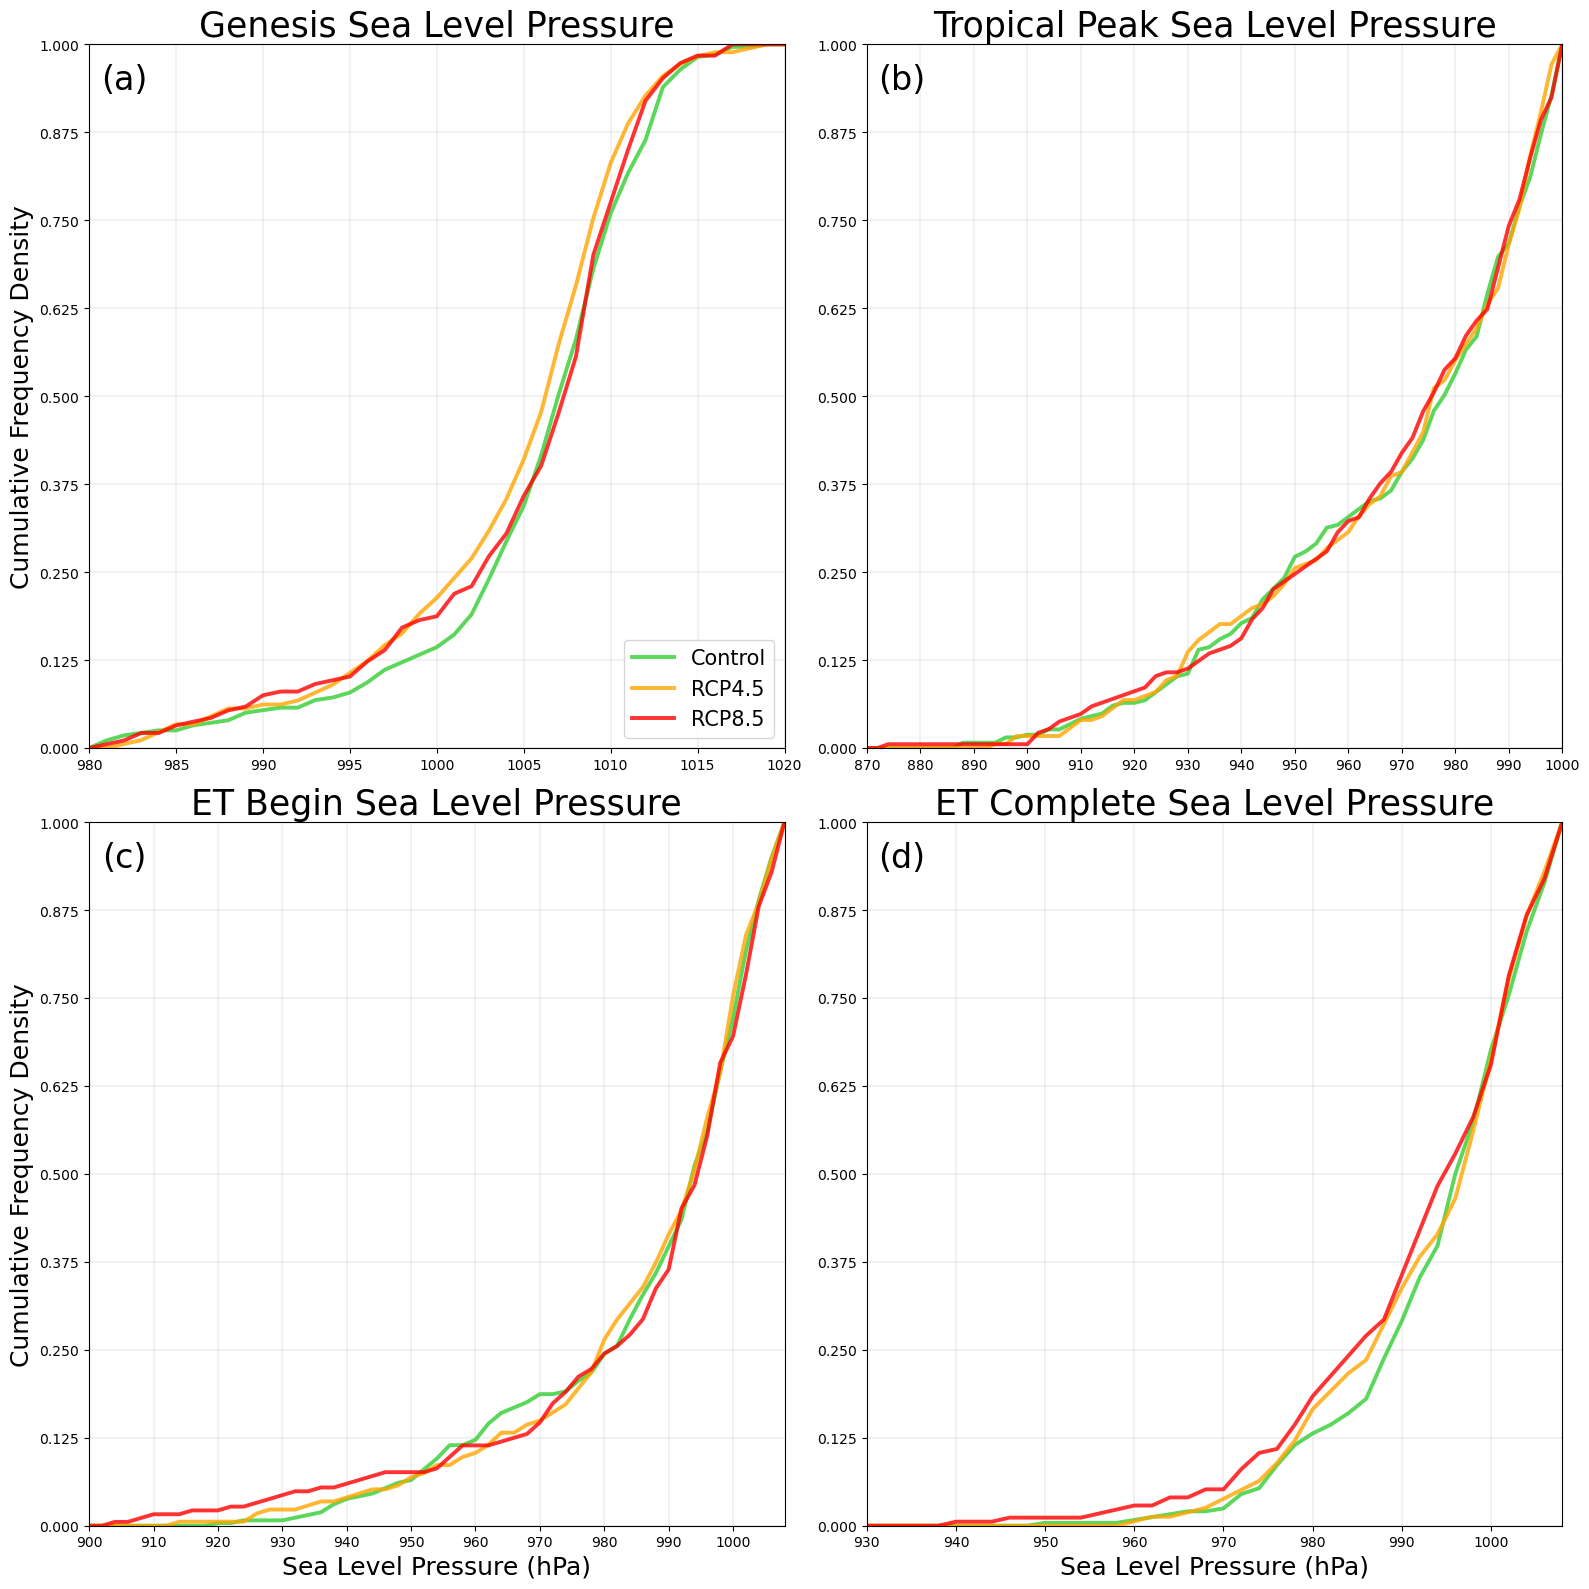

In [18]:
# ET Initiation and Completion Sea Level Pressure
Var = "SLP"
Var_Label = "Sea Level Pressure"
Horiz = False
Mins = [980, 870, 900, 930]
Maxes = [1020, 1000, 1008, 1008]
Bin_Widths = [1, 2, 2, 2]
Label_Widths = [5, 10, 10, 10]
Savefig = True
Figname = 'ET_SLP_Cumulative.png'
ET_Cum_Dist_Plot(Control_ET, RCP45_ET, RCP85_ET, Var, Var_Label, Horiz, \
Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname)

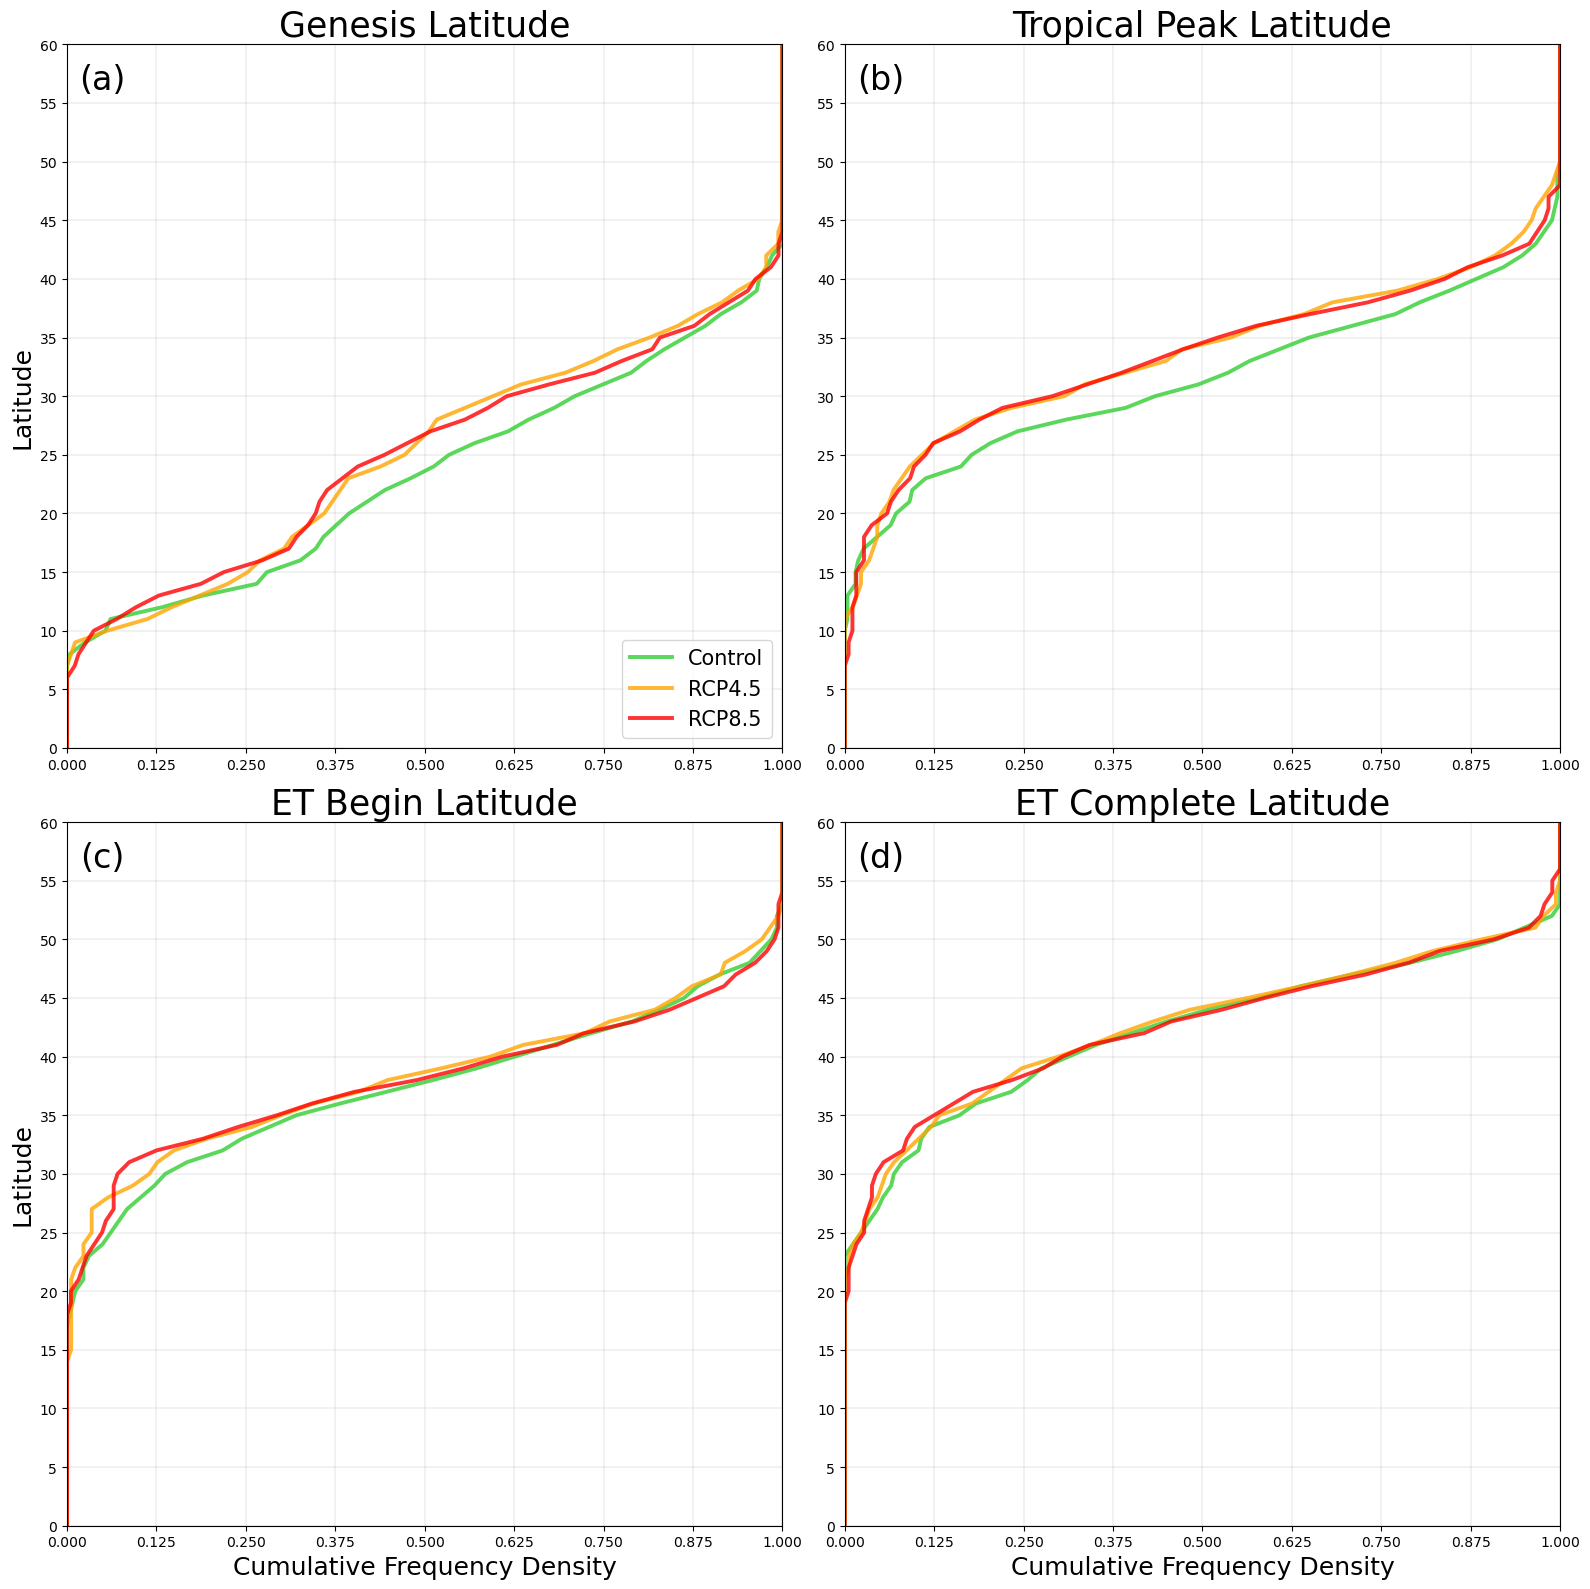

In [19]:
# ET Initiation and Completion Latitude
Var = "Lat"
Var_Label = "Latitude"
Horiz = True
Mins = [0, 0, 0, 0]
Maxes = [60, 60, 60, 60]
Bin_Widths = [1, 1, 1, 1]
Label_Widths = [5, 5, 5, 5]
Savefig = True
Figname = 'ET_Latitude_Cumulative.png'
ET_Cum_Dist_Plot(Control_ET, RCP45_ET, RCP85_ET, Var, Var_Label, Horiz, \
Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname)

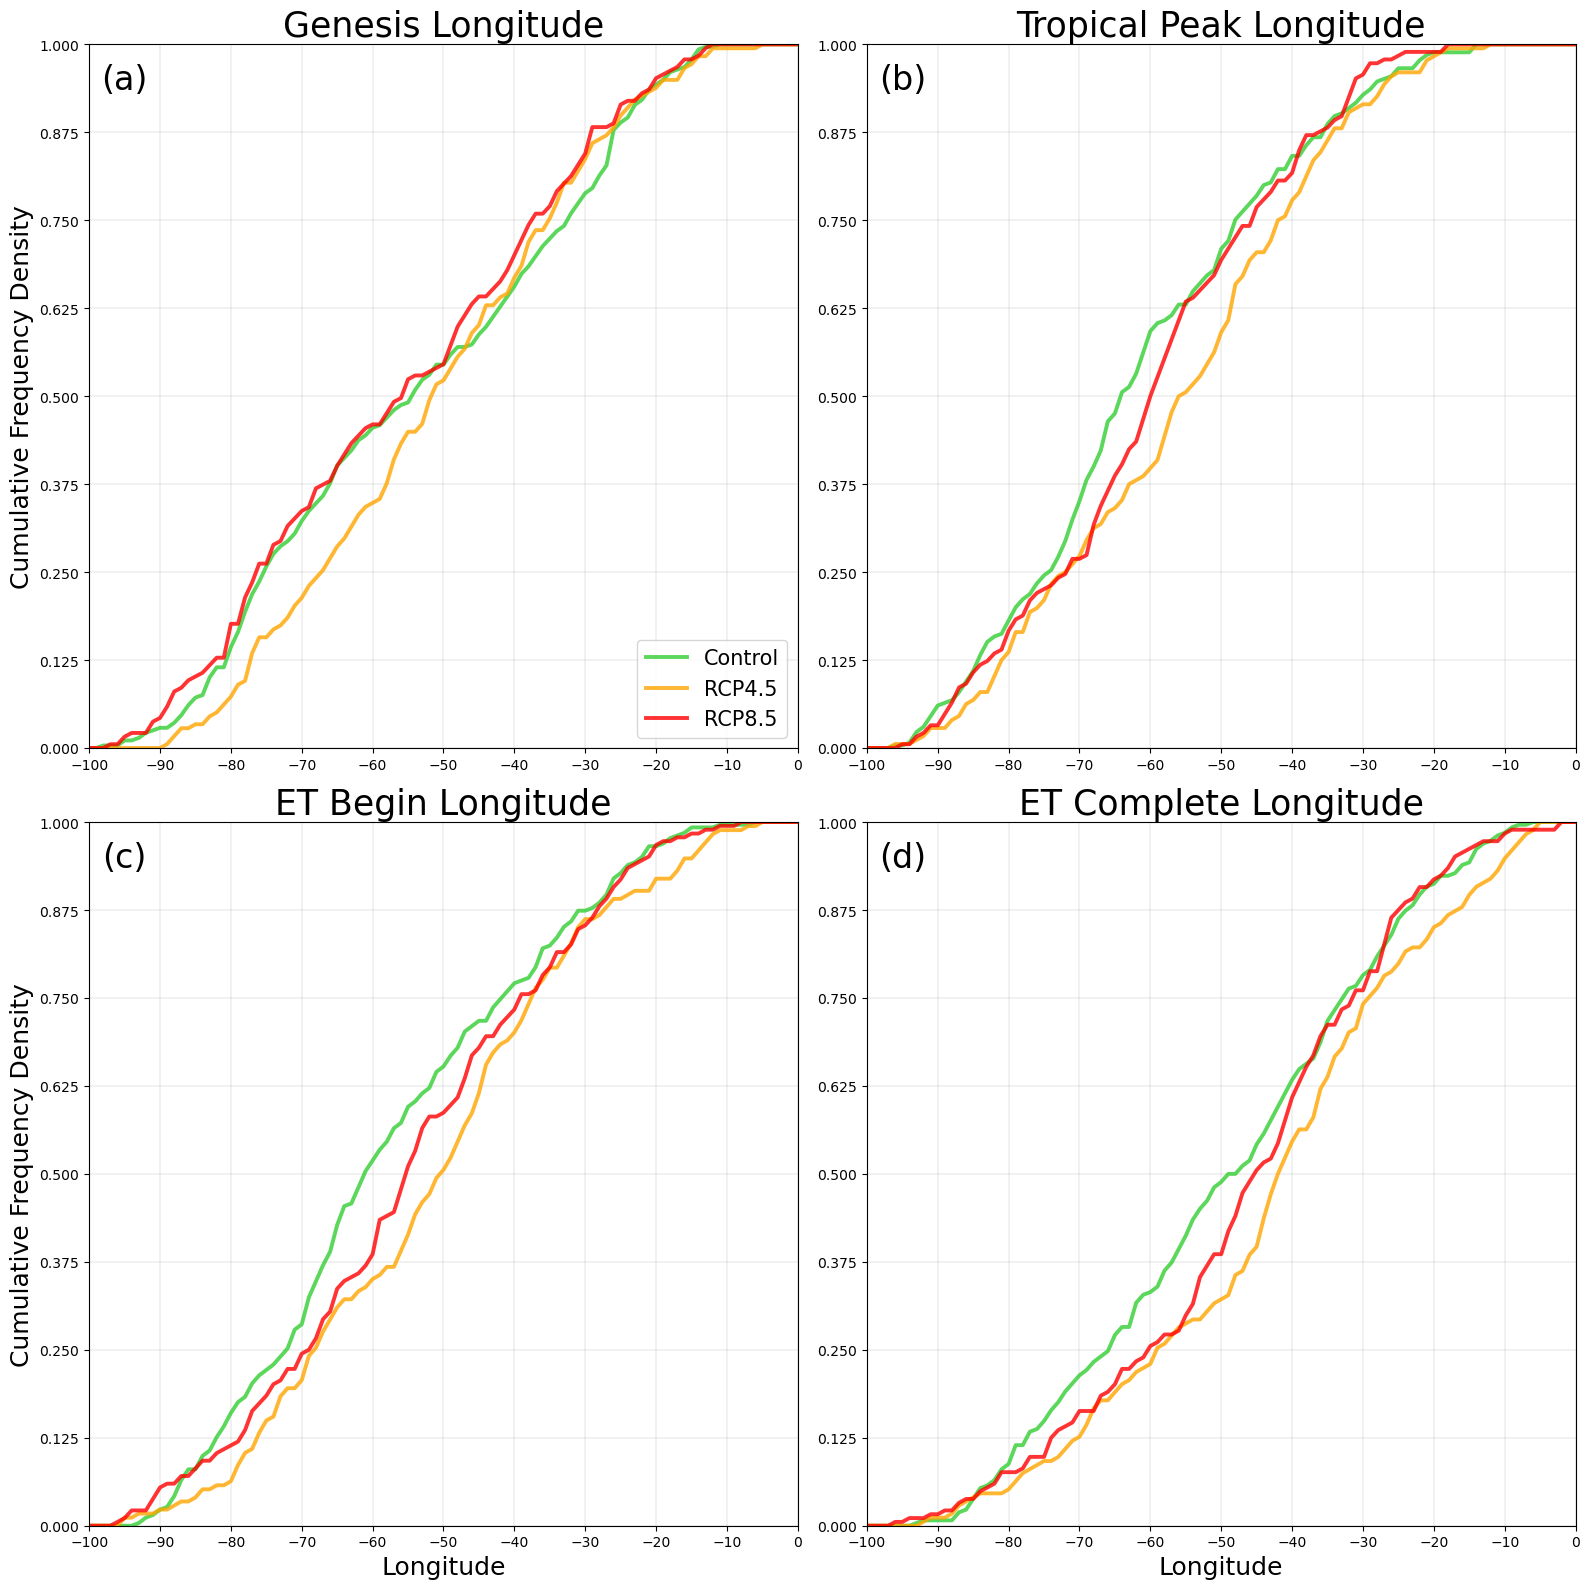

In [20]:
# ET Initiation and Completion Longitude
Var = "Lon"
Var_Label = "Longitude"
Horiz = False
Mins = [-100, -100, -100, -100]
Maxes = [0, 0, 0, 0]
Bin_Widths = [1, 1, 1, 1]
Label_Widths = [10, 10, 10, 10]
Savefig = True
Figname = 'ET_Longitude_Cumulative.png'
ET_Cum_Dist_Plot(Control_ET, RCP45_ET, RCP85_ET, Var, Var_Label, Horiz, \
Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname)

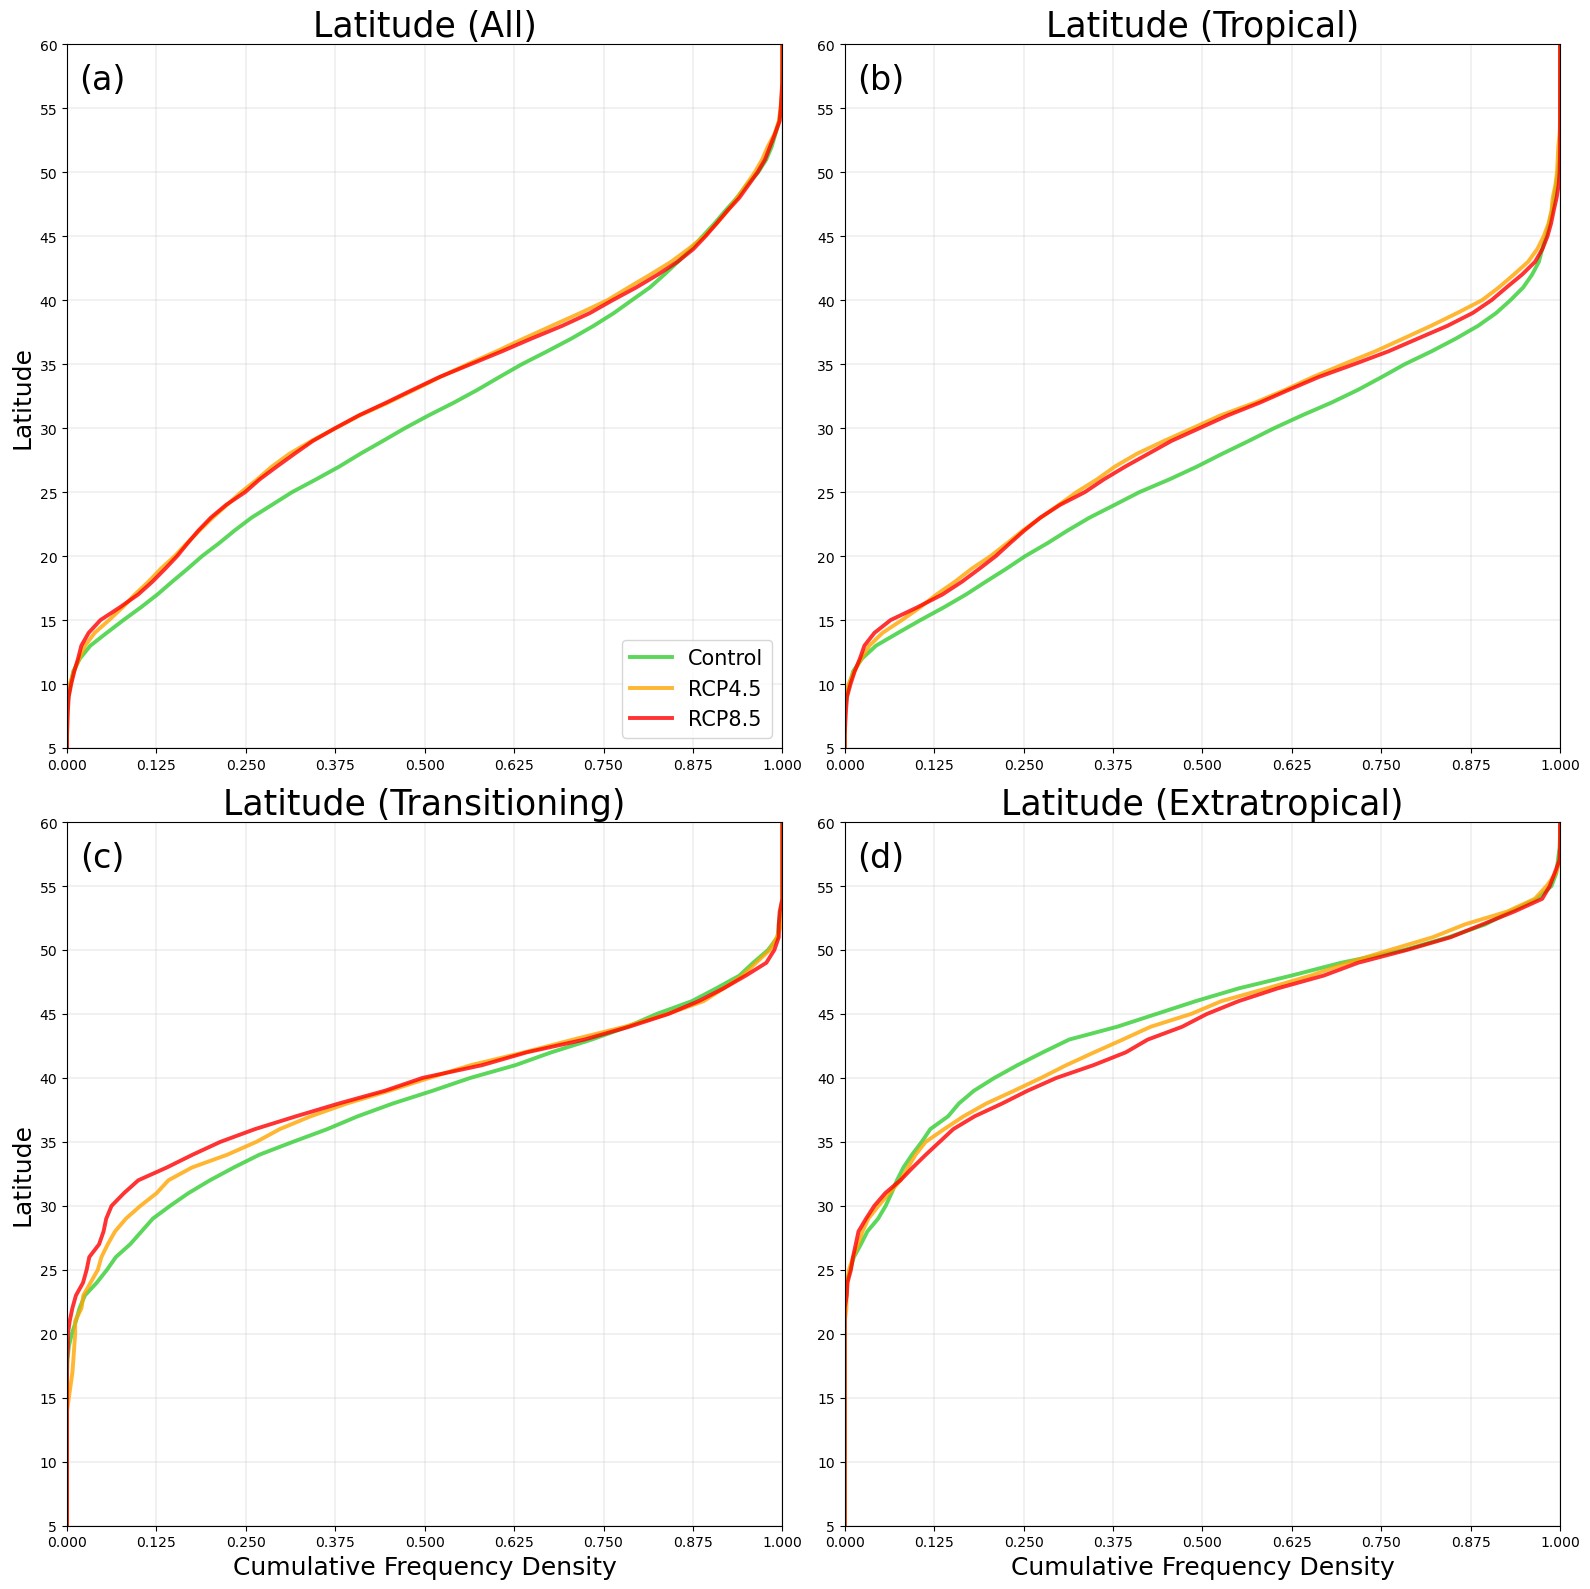

In [21]:
# Latitude in Each Storm Phase
Var = "Lat"
Var_Label = "Latitude"
Horiz = True
Mins = [5, 5, 5, 5]
Maxes = [60, 60, 60, 60]
Bin_Widths = [1, 1, 1, 1]
Label_Widths = [5, 5, 5, 5]
Savefig = True
Figname = 'Phase_Latitude_Cumulative.png'
Phase_Cum_Dist_Plot(Control_Data, RCP45_Data, RCP85_Data, Var, Var_Label, Horiz, \
Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname)

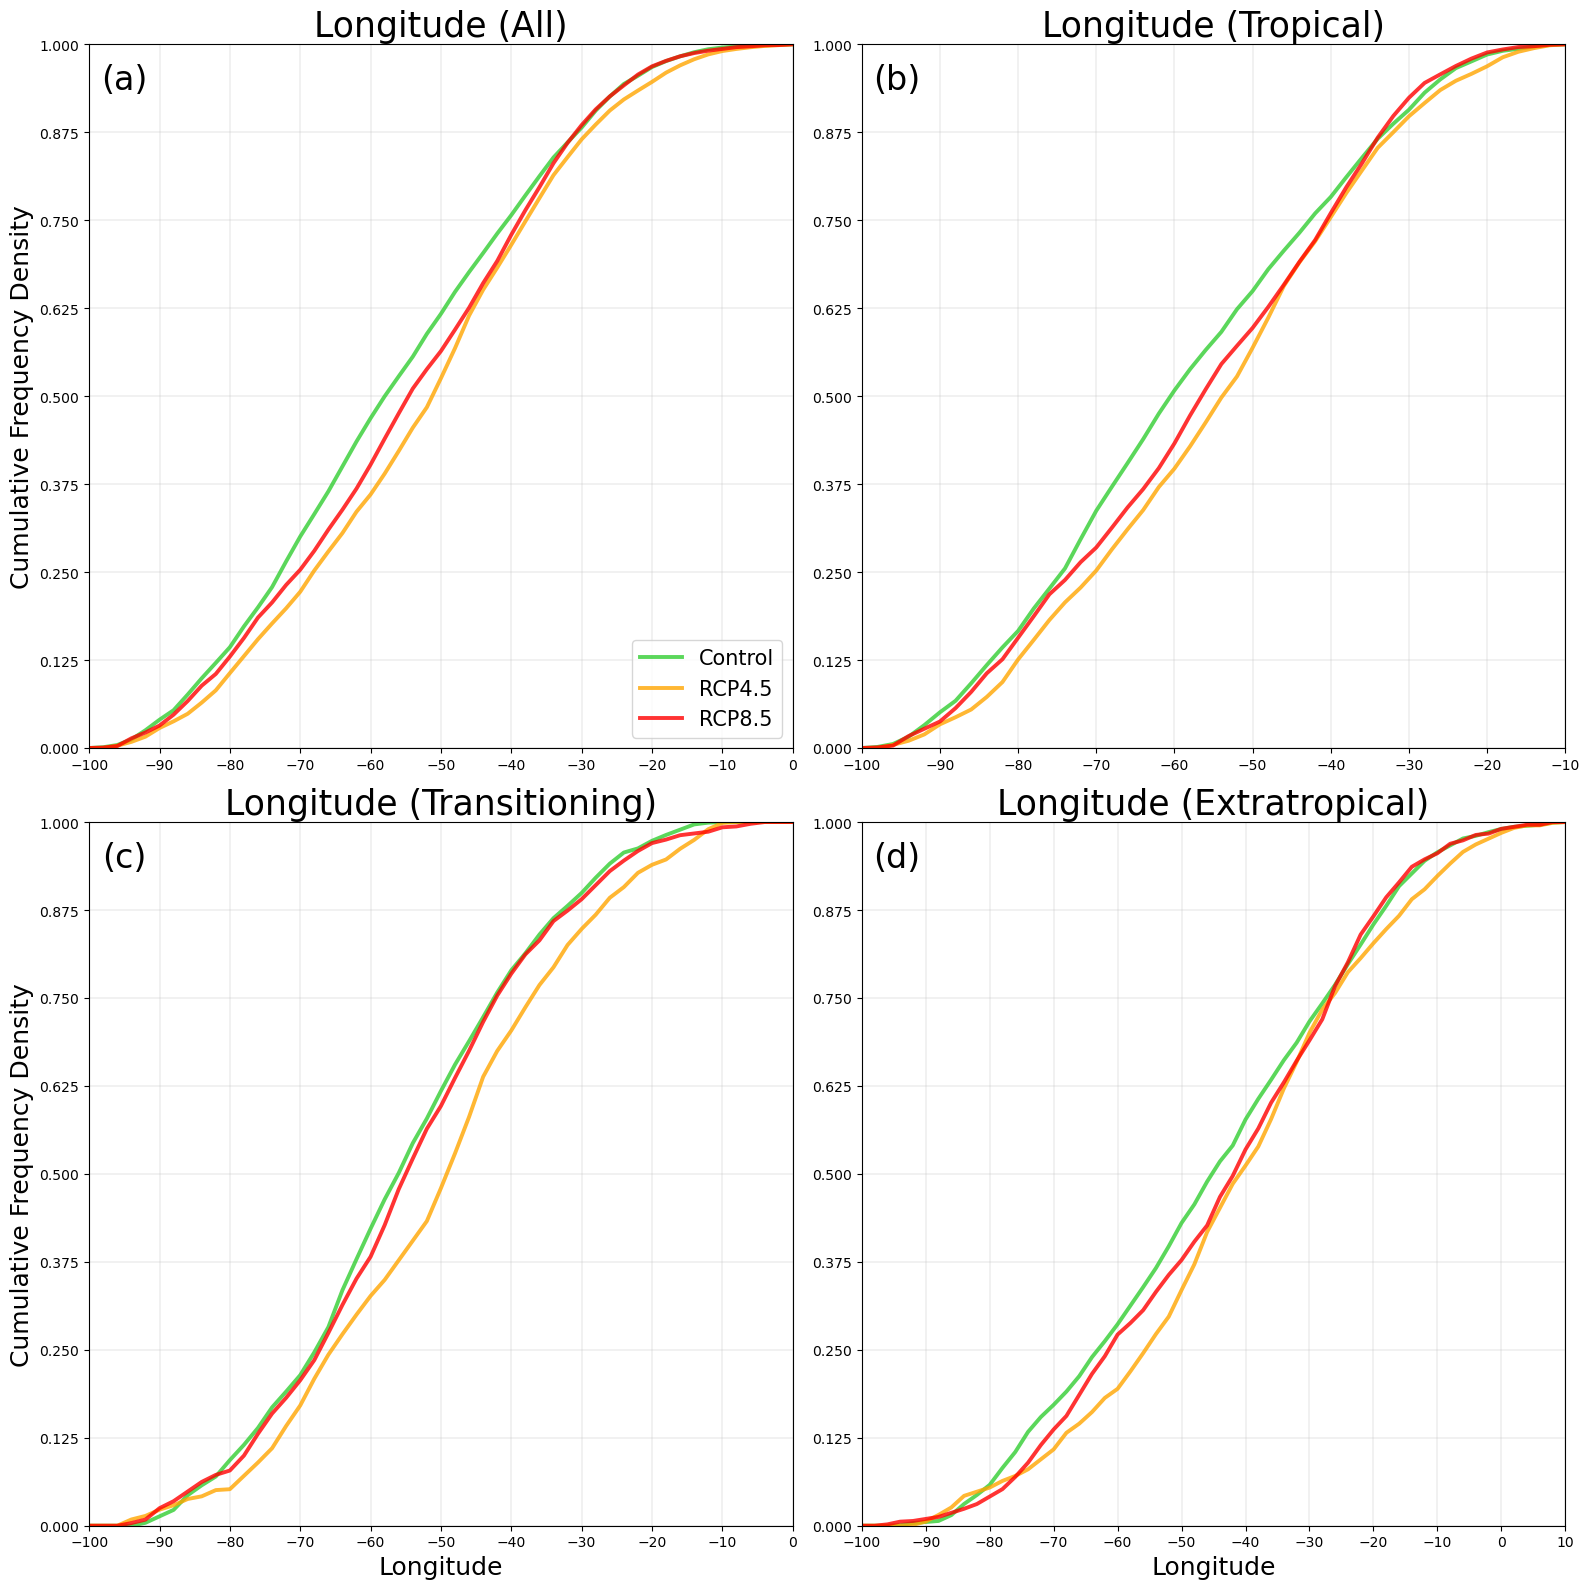

In [22]:
# Longitude in Each Storm Phase
Var = "Lon"
Var_Label = "Longitude"
Horiz = False
All_Min, Trop_Min, Trans_Min, Extra_Min = -100, -100, -100, -100
All_Max, Trop_Max, Trans_Max, Extra_Max = 0, -10, 0, 10
Mins = [-100, -100, -100, -100]
Maxes = [0, -10, 0, 10]
Bin_Widths = [2, 2, 2, 2]
Label_Widths = [10, 10, 10, 10]
Savefig = True
Figname = 'Phase_Longitude_Cumulative.png'
Phase_Cum_Dist_Plot(Control_Data, RCP45_Data, RCP85_Data, Var, Var_Label, Horiz, \
Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname)

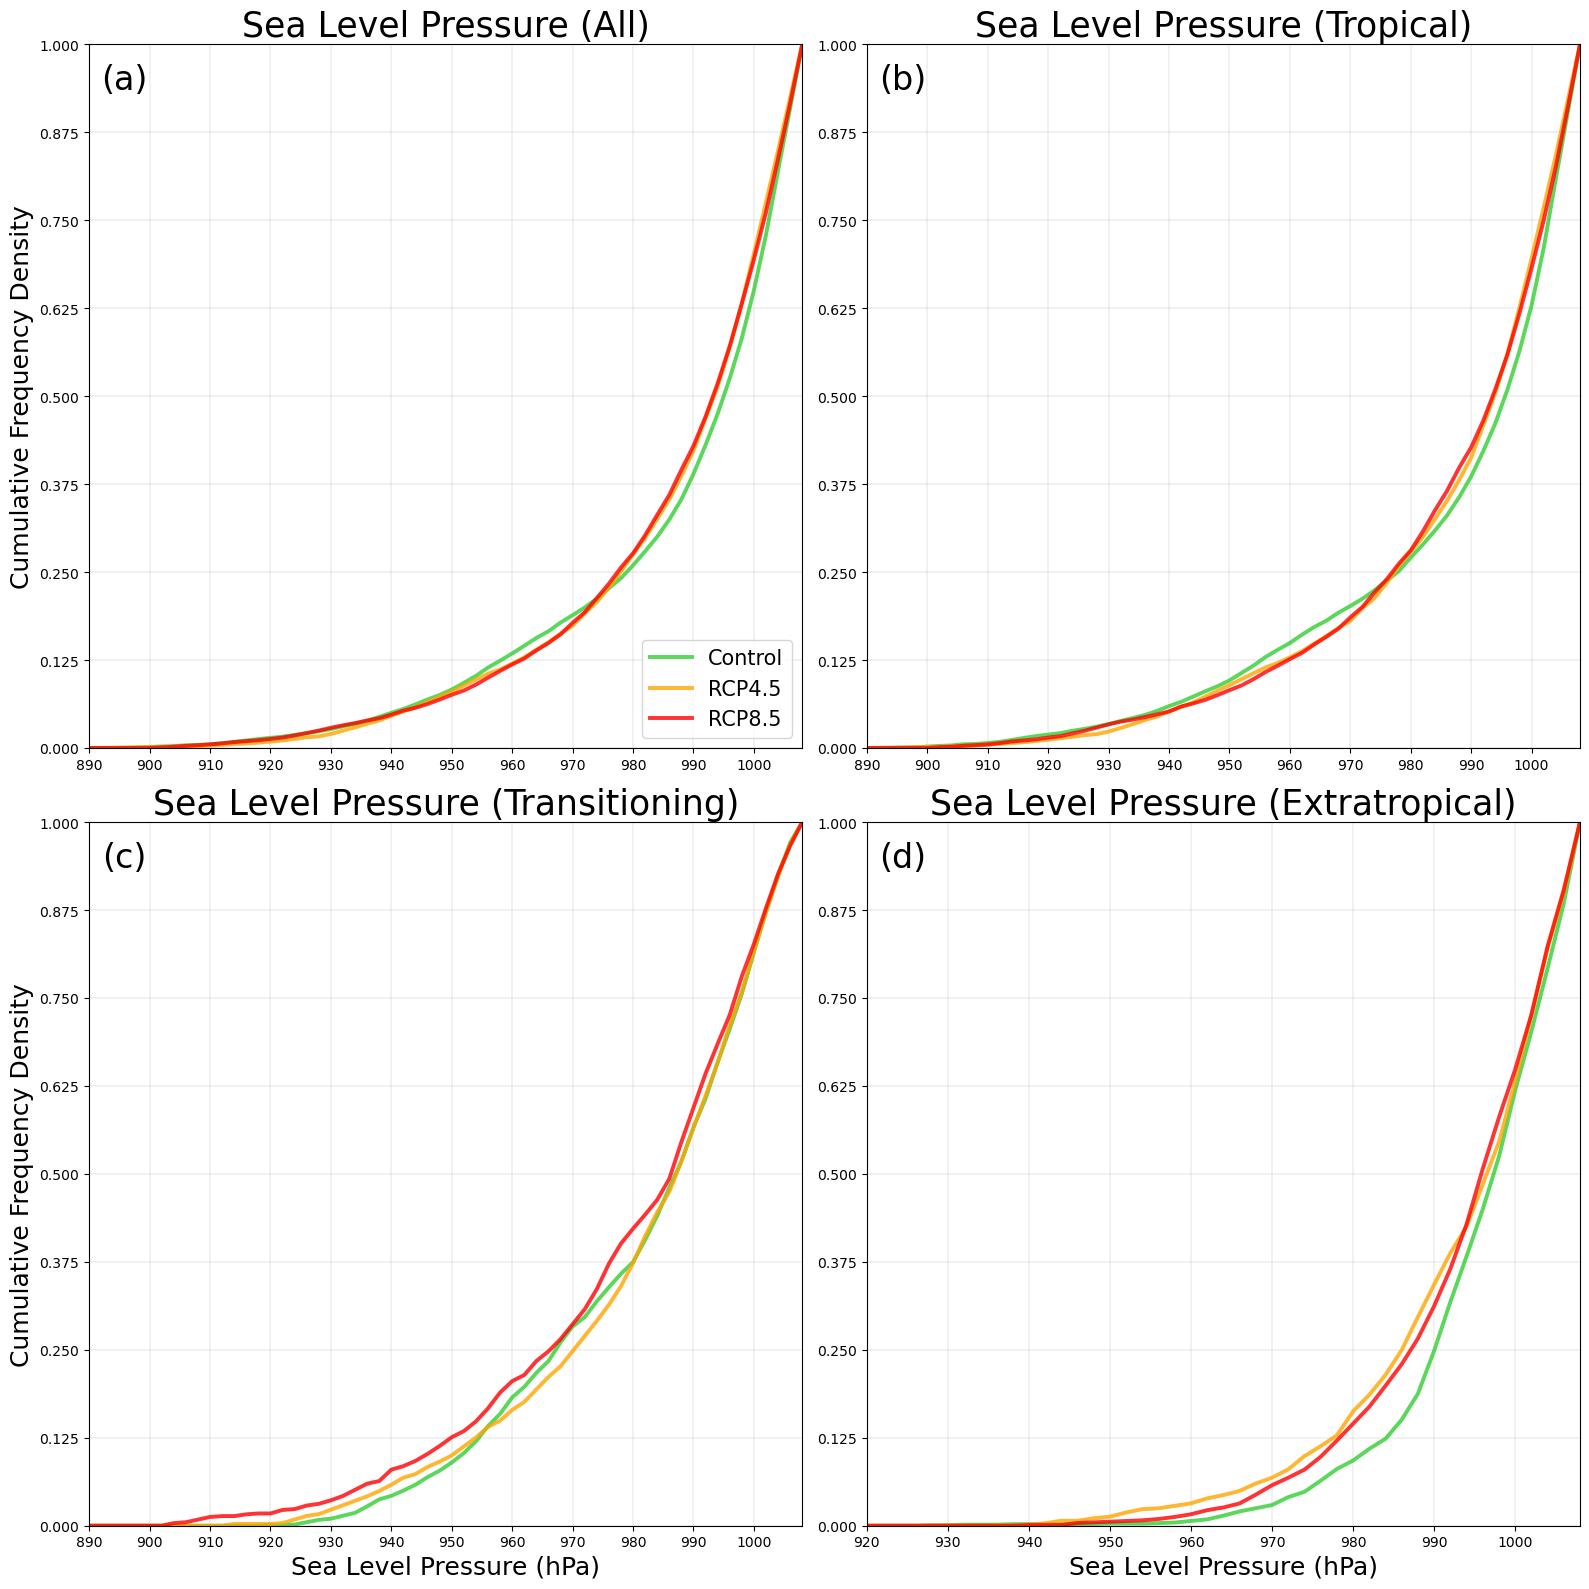

In [23]:
# Latitude in Each Storm Phase
Var = "SLP(hPa)"
Var_Label = "Sea Level Pressure"
Horiz = False
Mins = [890, 890, 890, 920]
Maxes = [1008, 1008, 1008, 1008]
Bin_Widths = [2, 2, 2, 2]
Label_Widths = [10, 10, 10, 10]
Savefig = True
Figname = 'Phase_SLP_Cumulative.png'
Phase_Cum_Dist_Plot(Control_Data, RCP45_Data, RCP85_Data, Var, Var_Label, Horiz, \
Mins, Maxes, Bin_Widths, Label_Widths, Savefig, Figname)